In [1]:
import pandas as pd
import numpy as np
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
%matplotlib inline

In [2]:
from scipy import interp
from matplotlib import rc, font_manager
from matplotlib import pyplot as plt
font_location = "C:/Windows/Fonts/NanumSquareR.ttf"
font_manager.FontProperties(fname=font_location)
rc('font', family="NanumSquare")

In [3]:
X = pd.read_excel("../301-8/data/data/4단계X.xlsx", index_col='인덱스')
Y = pd.read_excel("../301-8/data/data/4단계Y.xlsx",index_col='인덱스')

In [4]:
X2 = scale(X)

C:\Users\301-8\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [5]:
X2

array([[-0.74659579, -0.74154107, -0.69018036, ..., -0.61795345,
        -0.61231982, -0.61004355],
       [-0.60334187, -0.59235377, -0.56040142, ..., -0.62621935,
        -0.62305826, -0.61633233],
       [-0.47238264, -0.47428611, -0.36047171, ..., -0.62367299,
        -0.6208562 , -0.61600394],
       ...,
       [ 1.10617338,  1.04750449,  0.6694294 , ...,  1.16804329,
         1.13459306,  1.19454285],
       [ 1.95547437,  1.83978655,  1.45073368, ...,  1.38009702,
         1.46668267,  1.49344907],
       [ 1.79218976,  1.93020714,  1.81595616, ...,  1.69538967,
         1.01966458,  1.10718946]])

In [6]:
Y2=[0 for i in range(0,len(Y.columns))]
Y_train2=[0 for i in range(0,len(Y.columns))]
Y_test2=[0 for i in range(0,len(Y.columns))]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.30, random_state=0)

In [8]:
for i in range(0,len(Y.columns)):    
    Y_test2[i] = pd.get_dummies(Y_test[Y_test.columns[i]])
    Y_train2[i] = pd.get_dummies(Y_train[Y_train.columns[i]])

In [9]:
Y_test2[0]

,-2,-1,1,2
인덱스,,,,
201711장충단로8길,1,0,0,0
201805미성3길,0,1,0,0
201712한천로78길,0,0,0,1
201801거북골로23길,0,1,0,0
201711보문로34길,0,0,0,1
201805동일로207길,0,0,0,1
201712남부순환로70길,1,0,0,0
201708화곡로_J,0,0,0,1
201703월드컵로_C,0,0,0,1


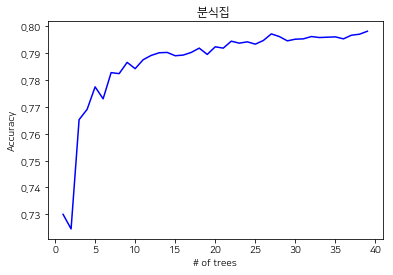

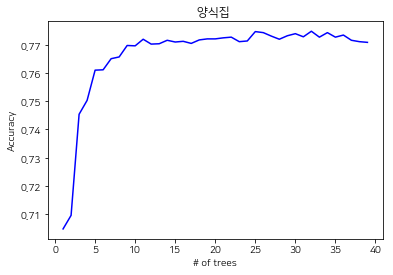

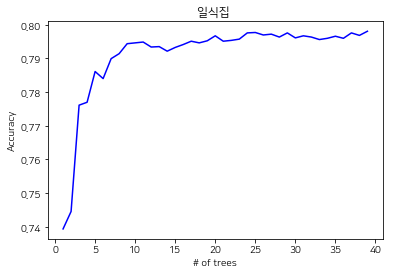

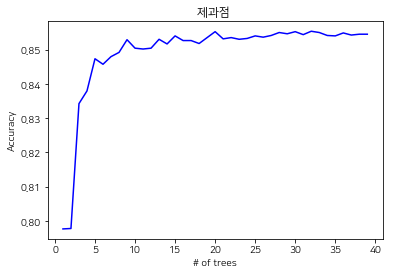

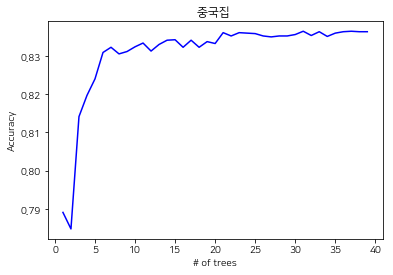

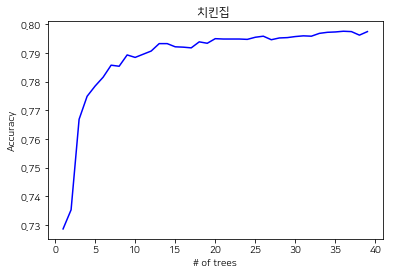

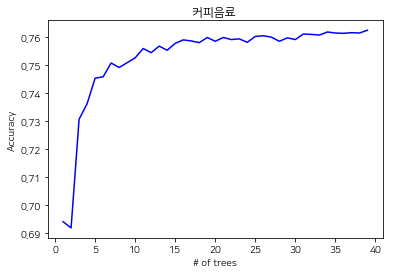

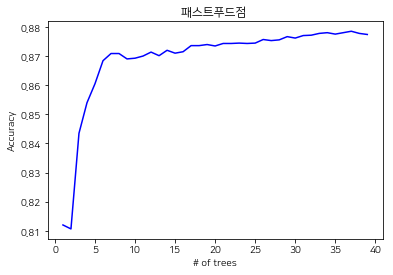

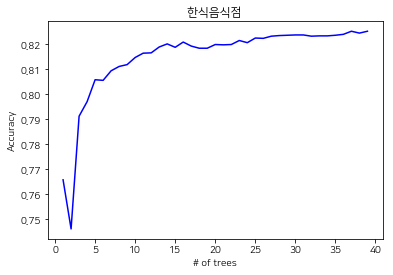

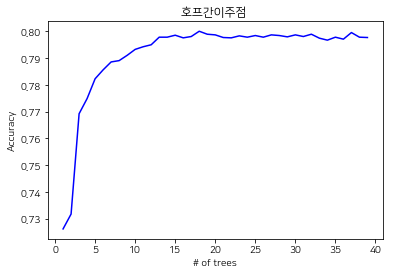

In [10]:
k = 40
x = [i for i in range(1,k)]
for j in range(0,len(Y.columns)):
    test_score=[]
    for i in range(1,k):
        clf = RandomForestClassifier(n_estimators = i, random_state=0)
        clf.fit(X_train, Y_train[Y_train.columns[j]])
        test_score.append(clf.score(X_test, Y_test[Y_test.columns[j]]))
    plt.figure()
    plt.plot(x,test_score, c='blue')
    plt.xlabel('# of trees')
    plt.ylabel('Accuracy')
    plt.title("{0} ".format(Y_test.columns[j]))
    plt.savefig('../301-8/data/data/png/{0}.png'.format(Y.columns[j]))

In [12]:
grades = ['Grade F','Grade C','Grade B','Grade A']

In [14]:
grades[0]

'Grade F'

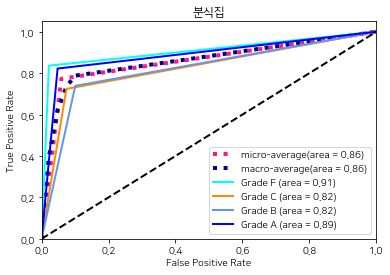

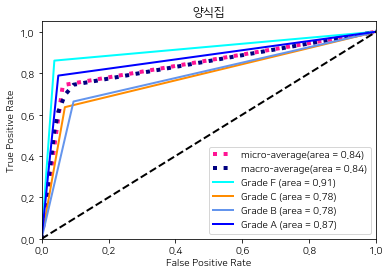

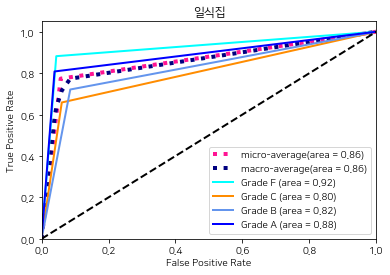

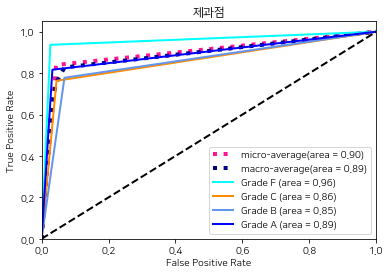

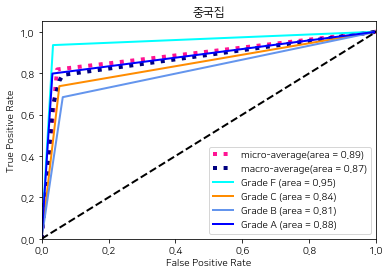

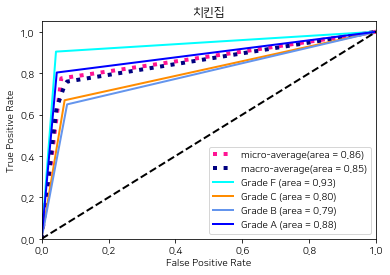

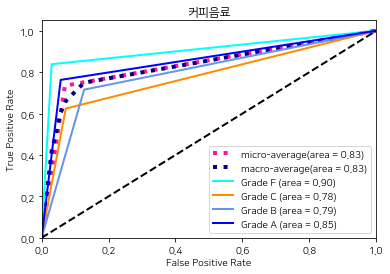

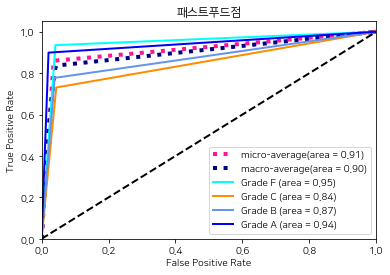

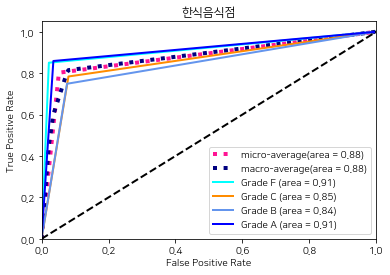

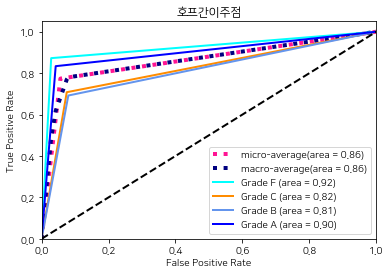

In [15]:
lw=2
for i in range(0,len(Y.columns)):
    clf = RandomForestClassifier(n_estimators = 30, random_state=0)
    clf.fit(X_train, Y_train2[i])
    y_score = clf.fit(X_train, Y_train2[i]).predict(X_test)
    a = np.array(Y_test2[i])
    b = np.array(y_score)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 4
    for k in range(n_classes):
        fpr[k], tpr[k], _ = roc_curve(a[:,k], b[:,k])
        roc_auc[k] = auc(fpr[k], tpr[k])
    fpr["micro"], tpr["micro"], _ = roc_curve(a.ravel(), b.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for j in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[j], tpr[j])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average(area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average(area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue'])
    for a, color in zip(range(n_classes), colors):
        plt.plot(fpr[a], tpr[a], color=color, lw=lw,
                 label='{0} (area = {1:0.2f})'
                 ''.format(grades[a], roc_auc[a]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("{0}".format(Y.columns[i]))
    plt.legend(loc="lower right")
    plt.savefig('../301-8/data/data/roc/{0}.png'.format(Y.columns[i]))